In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt

# [kode sebelumnya tetap sama sampai fungsi run_aco]

def run_aco_with_history(n_ants, n_iterations, alpha, beta, rho, Q):
    n_cities = len(distances)
    pheromone = initialize_pheromone(n_cities)
    best_tour = None
    best_length = float('inf')
    history = []  # Untuk menyimpan jarak terbaik setiap iterasi
    
    current_best = float('inf')
    for iteration in range(n_iterations):
        ant_tours = []
        tour_lengths = []
        
        # Membangun solusi
        for ant in range(n_ants):
            tour = ant_tour(pheromone, distances, alpha, beta)
            length = calculate_tour_length(tour, distances)
            ant_tours.append(tour)
            tour_lengths.append(length)
            
            if length < best_length:
                best_length = length
                best_tour = tour
                current_best = length
        
        # Menyimpan jarak terbaik untuk iterasi ini
        history.append(current_best)
        
        # Memperbarui feromon
        pheromone = update_pheromone(pheromone, ant_tours, tour_lengths, rho, Q)
    
    return best_tour, best_length, history

def create_convergence_plot(results_with_history):
    plt.figure(figsize=(15, 10))
    colors = ['b', 'g', 'r', 'c']  # Warna berbeda untuk setiap jumlah semut
    markers = ['o', 's', '^', 'D']  # Marker berbeda untuk setiap jumlah semut
    
    for idx, n_ants in enumerate(n_ants_list):
        plt.subplot(2, 2, idx + 1)
        
        for result in results_with_history:
            if result['n_ants'] == n_ants:
                plt.plot(range(1, result['n_iterations'] + 1), 
                        result['history'],
                        label=f'{result["n_iterations"]} iterasi',
                        marker=markers[n_ants_list.index(n_ants)],
                        markersize=4,
                        markevery=max(1, len(result['history'])//10))
        
        plt.title(f'Konvergensi dengan {n_ants} Semut')
        plt.xlabel('Iterasi')
        plt.ylabel('Jarak Terpendek (mil)')
        plt.grid(True)
        plt.legend()
    
    plt.tight_layout()
    return plt

# Parameter yang akan diuji
n_ants_list = [5, 10, 15, 20]
n_iterations_list = [10, 25, 50, 75, 100]
alpha = 1
beta = 1
rho = 0.15
Q = 1

# Menjalankan eksperimen
print("ALGORITMA OPTIMASI KOLONI SEMUT (ACO) UNTUK TSP")
print("=" * 80)
print(f"Parameter tetap:")
print(f"Alpha = {alpha} (bobot feromon)")
print(f"Beta = {beta} (bobot jarak)")
print(f"Rho = {rho} (tingkat penguapan)")
print(f"Q = {Q} (konstanta deposit feromon)")
print("=" * 80)

results_with_history = []
for n_ants in n_ants_list:
    for n_iterations in n_iterations_list:
        print(f"\nMenjalankan percobaan dengan {n_ants} semut dan {n_iterations} iterasi:")
        print("-" * 70)
        
        best_tour, best_length, history = run_aco_with_history(n_ants, n_iterations, alpha, beta, rho, Q)
        tour_cities = [cities[i] for i in best_tour]
        
        print(f"Rute terbaik yang ditemukan:")
        print(" -> ".join(tour_cities))
        print(f"Total jarak tempuh: {best_length:,.2f} mil")
        
        results_with_history.append({
            'n_ants': n_ants,
            'n_iterations': n_iterations,
            'best_length': best_length,
            'best_tour': tour_cities,
            'history': history
        })



ALGORITMA OPTIMASI KOLONI SEMUT (ACO) UNTUK TSP
Parameter tetap:
Alpha = 1 (bobot feromon)
Beta = 1 (bobot jarak)
Rho = 0.15 (tingkat penguapan)
Q = 1 (konstanta deposit feromon)

Menjalankan percobaan dengan 5 semut dan 10 iterasi:
----------------------------------------------------------------------
Rute terbaik yang ditemukan:
New York -> Philadelphia -> Chicago -> Houston -> San Antonio -> Phoenix -> San Diego -> Los Angeles -> San Jose -> Dallas -> New York
Total jarak tempuh: 6,650.00 mil

Menjalankan percobaan dengan 5 semut dan 25 iterasi:
----------------------------------------------------------------------
Rute terbaik yang ditemukan:
New York -> Philadelphia -> Chicago -> San Jose -> San Diego -> Los Angeles -> Phoenix -> San Antonio -> Houston -> Dallas -> New York
Total jarak tempuh: 6,297.00 mil

Menjalankan percobaan dengan 5 semut dan 50 iterasi:
----------------------------------------------------------------------
Rute terbaik yang ditemukan:
New York -> Philadelphi

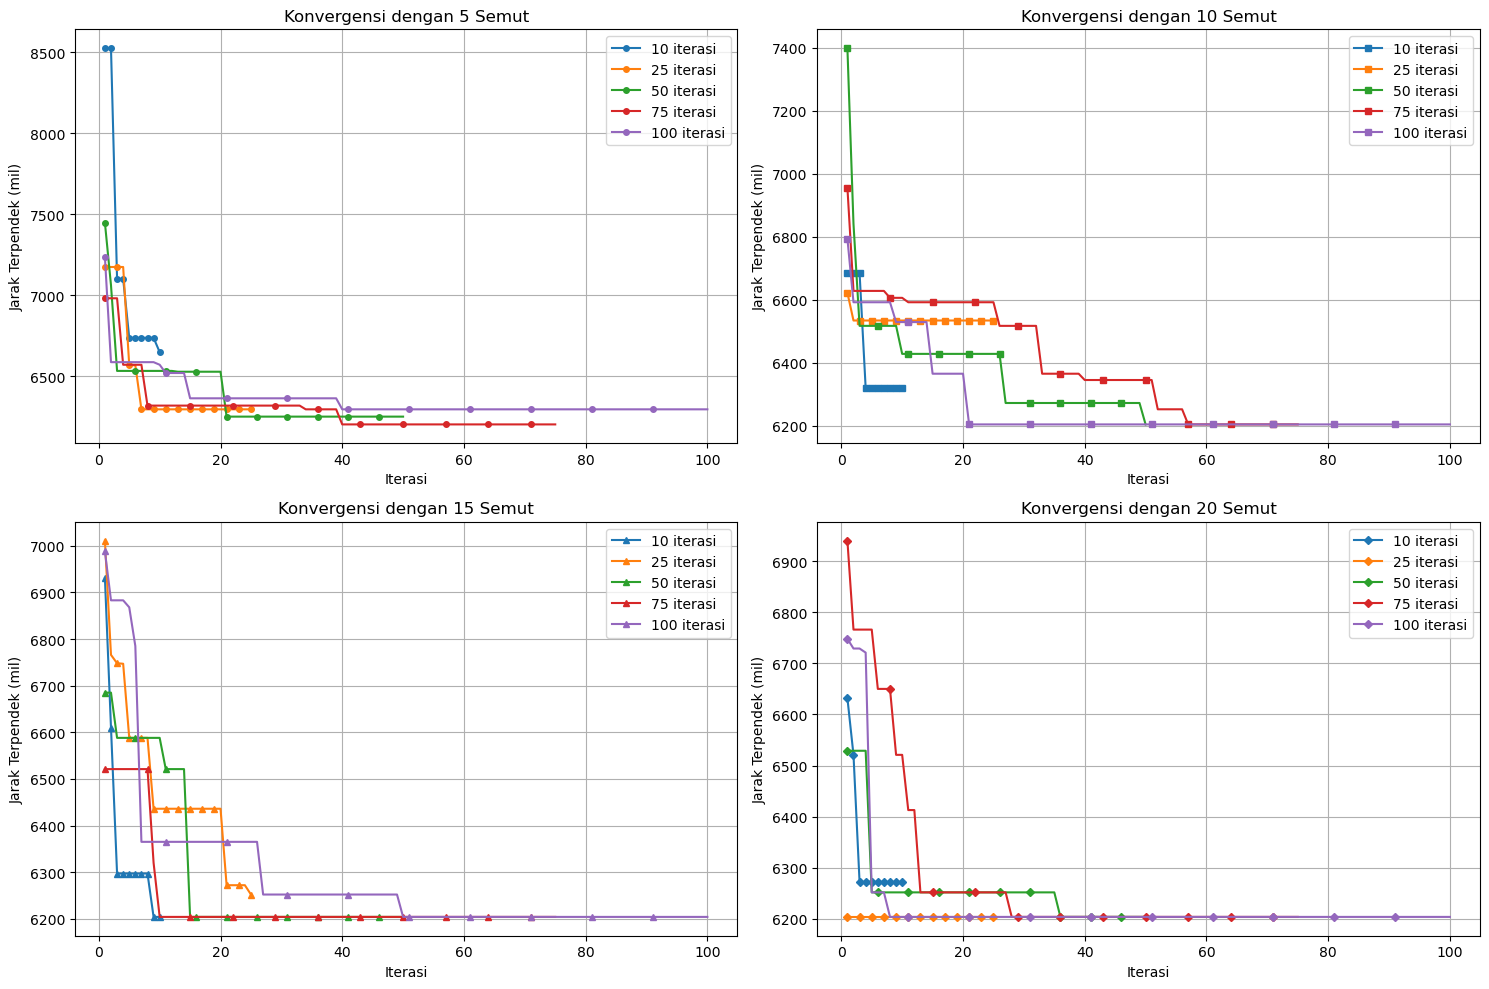


RINGKASAN HASIL EKSPERIMEN:
Jumlah Semut    Jumlah Iterasi  Jarak Terbaik  
----------------------------------------------------------------------------------------------------
5               10              6650.00        
5               25              6297.00        
5               50              6252.00        
5               75              6204.00        
5               100             6297.00        
10              10              6320.00        
10              25              6534.00        
10              50              6204.00        
10              75              6204.00        
10              100             6204.00        
15              10              6204.00        
15              25              6252.00        
15              50              6204.00        
15              75              6204.00        
15              100             6204.00        
20              10              6272.00        
20              25              6204.00        
20    

In [6]:
# Membuat dan menampilkan grafik
plt = create_convergence_plot(results_with_history)
#plt.suptitle('Grafik Konvergensi ACO untuk Berbagai Jumlah Semut dan Iterasi', fontsize=16)
plt.show()

# Menampilkan ringkasan hasil dalam bentuk tabel
print("\nRINGKASAN HASIL EKSPERIMEN:")
print("=" * 100)
print(f"{'Jumlah Semut':<15} {'Jumlah Iterasi':<15} {'Jarak Terbaik':<15}")
print("-" * 100)

for result in results_with_history:
    print(f"{result['n_ants']:<15} {result['n_iterations']:<15} {result['best_length']:<15.2f}")


Menjalankan ACO dengan 5 semut...

Menjalankan ACO dengan 10 semut...

Menjalankan ACO dengan 15 semut...

Menjalankan ACO dengan 20 semut...


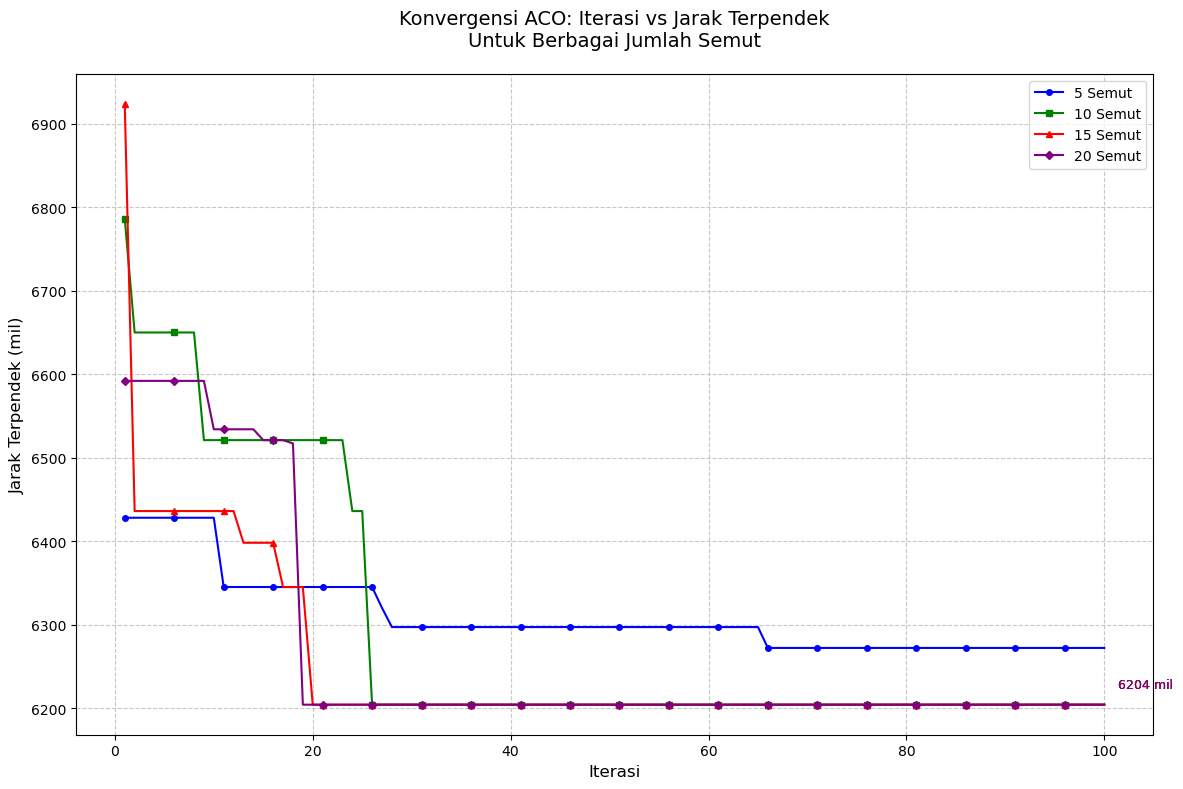


HASIL AKHIR:
Jumlah Semut    Jarak Terpendek
--------------------------------------------------
5               6204.00        
10              6204.00        
15              6204.00        
20              6204.00        


In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt

# [kode data dan fungsi-fungsi ACO sebelumnya tetap sama]

def run_aco_with_tracking(n_ants, n_iterations, alpha, beta, rho, Q):
    n_cities = len(distances)
    pheromone = initialize_pheromone(n_cities)
    best_length = float('inf')
    iteration_best_lengths = []  # Menyimpan jarak terbaik setiap iterasi
    
    for iteration in range(n_iterations):
        ant_tours = []
        tour_lengths = []
        
        # Konstruksi solusi oleh semut
        for ant in range(n_ants):
            tour = ant_tour(pheromone, distances, alpha, beta)
            length = calculate_tour_length(tour, distances)
            ant_tours.append(tour)
            tour_lengths.append(length)
            
            if length < best_length:
                best_length = length
        
        iteration_best_lengths.append(best_length)
        pheromone = update_pheromone(pheromone, ant_tours, tour_lengths, rho, Q)
    
    return iteration_best_lengths

# Parameter
n_ants_list = [5, 10, 15, 20]
n_iterations = 100  # Kita gunakan 100 iterasi untuk melihat konvergensi
alpha = 1
beta = 1
rho = 0.15
Q = 1

# Menjalankan eksperimen dan membuat visualisasi
plt.figure(figsize=(12, 8))

colors = ['b', 'g', 'r', 'purple']
markers = ['o', 's', '^', 'D']

for idx, n_ants in enumerate(n_ants_list):
    print(f"\nMenjalankan ACO dengan {n_ants} semut...")
    best_lengths = run_aco_with_tracking(n_ants, n_iterations, alpha, beta, rho, Q)
    
    plt.plot(range(1, n_iterations + 1), 
             best_lengths,
             label=f'{n_ants} Semut',
             color=colors[idx],
             marker=markers[idx],
             markersize=4,
             markevery=5)  # Plot marker setiap 5 iterasi

plt.title('Konvergensi ACO: Iterasi vs Jarak Terpendek\nUntuk Berbagai Jumlah Semut', 
          fontsize=14, pad=20)
plt.xlabel('Iterasi', fontsize=12)
plt.ylabel('Jarak Terpendek (mil)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Menambahkan anotasi untuk nilai akhir
for idx, n_ants in enumerate(n_ants_list):
    final_length = best_lengths[-1]
    plt.annotate(f'{final_length:.0f} mil', 
                xy=(n_iterations, final_length),
                xytext=(10, 10),
                textcoords='offset points',
                ha='left',
                va='bottom',
                fontsize=9,
                color=colors[idx])

plt.tight_layout()
plt.show()

# Menampilkan hasil numerik
print("\nHASIL AKHIR:")
print("=" * 50)
print(f"{'Jumlah Semut':<15} {'Jarak Terpendek':<15}")
print("-" * 50)
for idx, n_ants in enumerate(n_ants_list):
    print(f"{n_ants:<15} {best_lengths[-1]:<15.2f}")